UPLOADING ALL EMBEDDINGS AND DATA FILES

In [ ]:
from google.colab import drive
import numpy as np
import json

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/Machine Learning/'

try:

    w2v_fasttext_glove_combined = np.load(drive_path + 'w2v_fasttext_glove_combined_embeddings.npy')
    hybrid_embeddings = np.load(drive_path + 'hybrid_embeddings.npy')
    glove_w2v_enhanced = np.load(drive_path + 'glove_w2v_enhanced_embeddings.npy')
    final_w2v_embeddings = np.load(drive_path + 'final_w2v_embeddings.npy')

    with open(drive_path + 'final(dupless).json', 'r') as f:
        augmented_data = json.load(f)

    print("All files loaded successfully!")

    print("\nLoaded arrays shapes:")
    print(f"w2v_fasttext_glove_combined: {w2v_fasttext_glove_combined.shape}")
    print(f"hybrid_embeddings: {hybrid_embeddings.shape}")
    print(f"glove_w2v_enhanced: {glove_w2v_enhanced.shape}")
    print(f"final_w2v_embeddings: {final_w2v_embeddings.shape}")

    print("\nAugmented data type:", type(augmented_data))

except FileNotFoundError as e:
    print(f"File not found error: {e}")
    print("Please verify:")
    print(f"1. The folder name is exactly 'Mt2024121_PriyanshRai_Virtual_Demo'")
    print(f"2. All files exist in this folder")
    print("Current folder contents:")
    !ls "{drive_path}"
except Exception as e:
    print(f"Error loading files: {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA


W2V+FastText+GloVe Embedding Analysis:
Shape: (127621, 100)


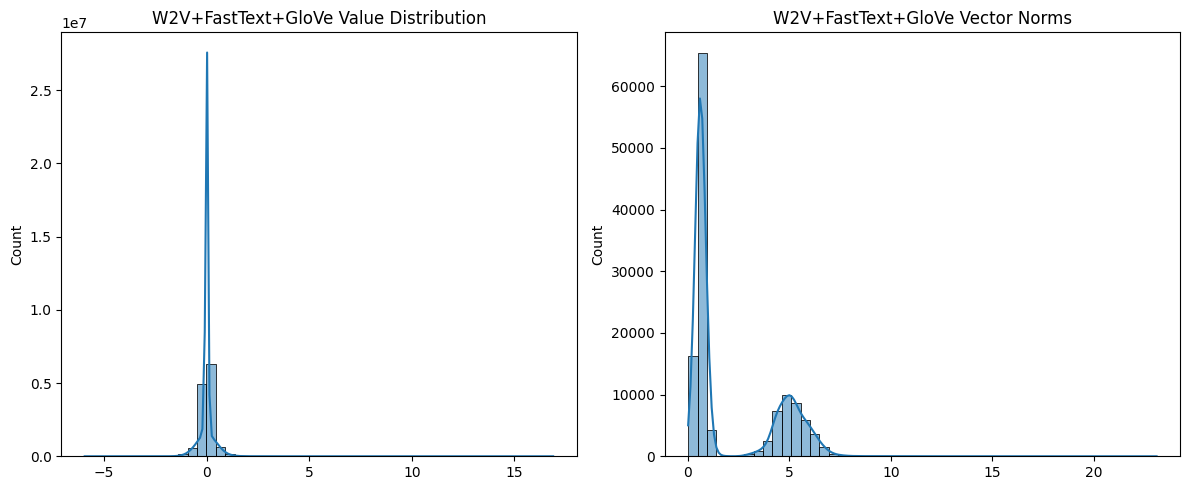

Min: -5.9516
Max: 16.8899
Mean: -0.0015
Std: 0.3035

Hybrid Embedding Analysis:
Shape: (127621, 100)


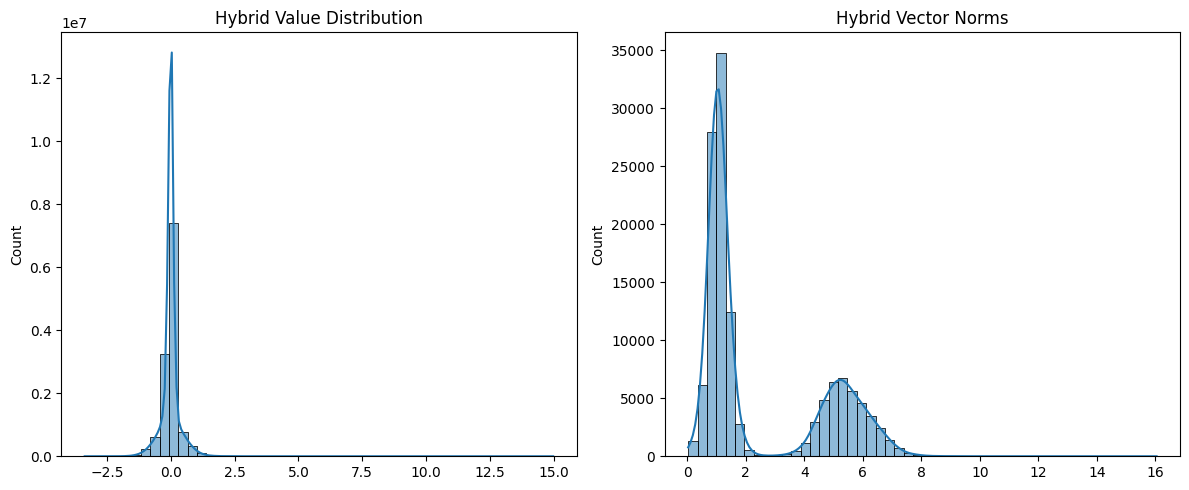

Min: -3.3692
Max: 14.9731
Mean: -0.0049
Std: 0.3267

GloVe+W2V Enhanced Embedding Analysis:
Shape: (127621, 100)


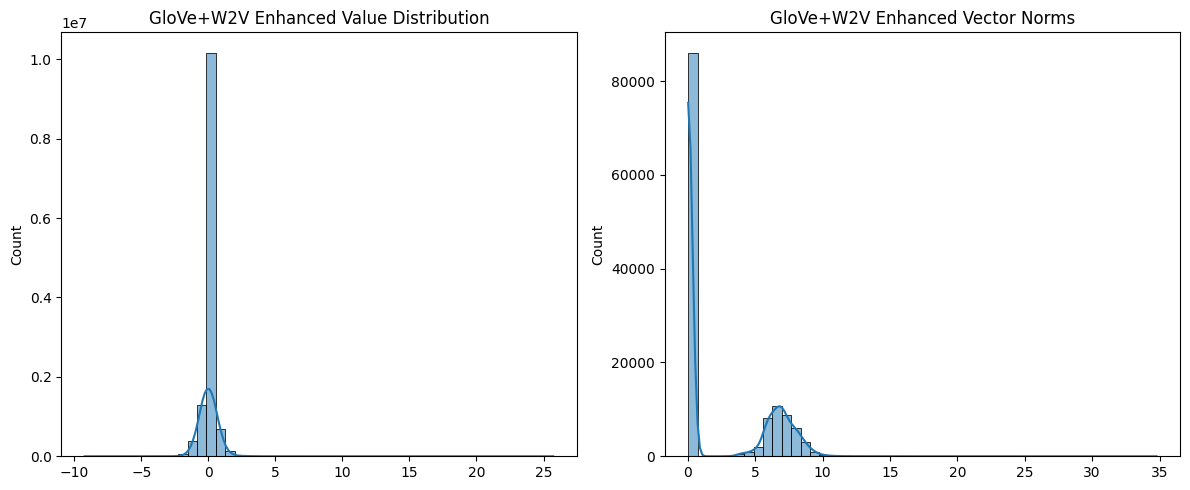

Min: -9.2173
Max: 25.7179
Mean: 0.0042
Std: 0.4038

Final W2V Embedding Analysis:
Shape: (127621, 100)


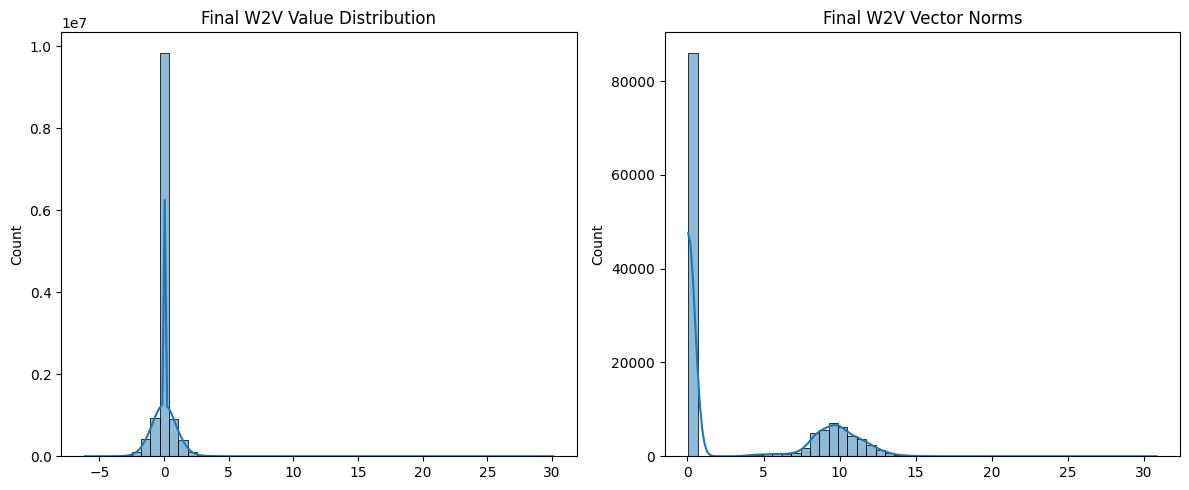

Min: -6.1306
Max: 30.0762
Mean: 0.0049
Std: 0.5672

Augmented JSON Data Analysis:
Shape: (138073, 4)
Sentiment counts:
 sentiment
 0    56201
 1    49047
-1    32825
Name: count, dtype: int64


<ipython-input-12-4475408c19c0>:58: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-4475408c19c0>:58: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


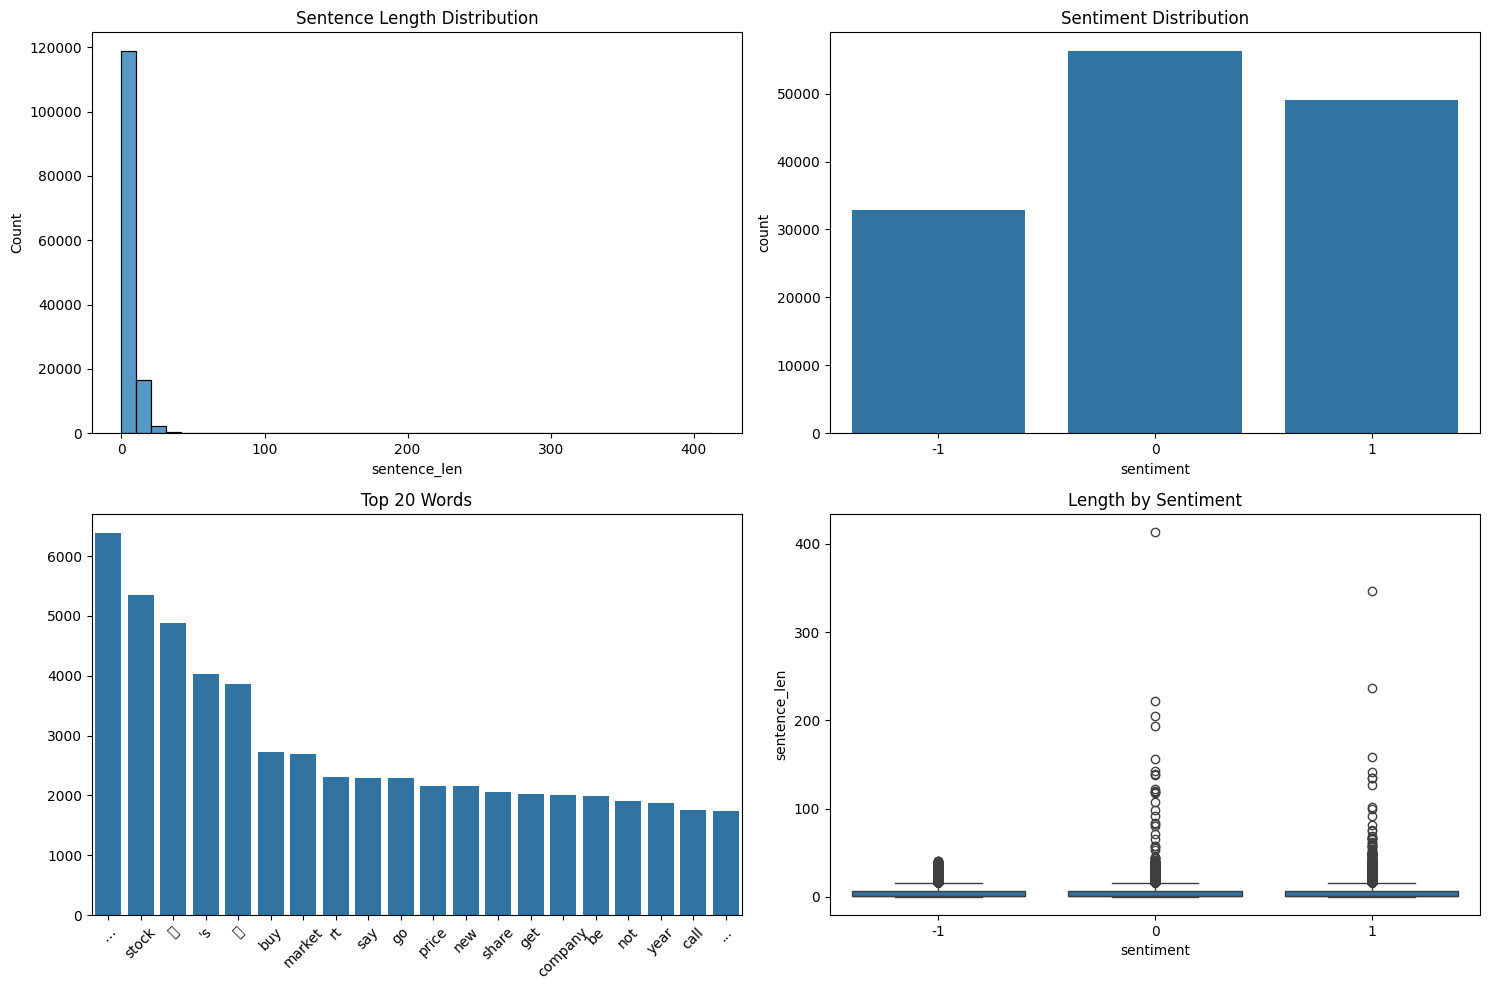

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_embeddings(embeddings, name):
    print(f"\n{name} Embedding Analysis:")
    print("Shape:", embeddings.shape)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(embeddings.flatten(), bins=50, kde=True)
    plt.title(f"{name} Value Distribution")

    plt.subplot(1, 2, 2)
    norms = np.linalg.norm(embeddings, axis=1)
    sns.histplot(norms, bins=50, kde=True)
    plt.title(f"{name} Vector Norms")
    plt.tight_layout()
    plt.show()

    print(f"Min: {np.min(embeddings):.4f}")
    print(f"Max: {np.max(embeddings):.4f}")
    print(f"Mean: {np.mean(embeddings):.4f}")
    print(f"Std: {np.std(embeddings):.4f}")

def analyze_json_data(data):
    data_df = pd.DataFrame(data)
    data_df['sentence_str'] = data_df['sentence'].apply(lambda x: ' '.join(x))
    data_df['sentence_len'] = data_df['sentence'].apply(len)

    print("\nAugmented JSON Data Analysis:")
    print("Shape:", data_df.shape)
    print("Sentiment counts:\n", data_df['sentiment'].value_counts())

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data_df['sentence_len'], bins=40)
    plt.title("Sentence Length Distribution")

    plt.subplot(2, 2, 2)
    sns.countplot(x='sentiment', data=data_df)
    plt.title("Sentiment Distribution")

    plt.subplot(2, 2, 3)
    all_words = [word for sent in data_df['sentence'] for word in sent]
    word_freq = Counter(all_words).most_common(20)
    sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
    plt.xticks(rotation=45)
    plt.title("Top 20 Words")

    plt.subplot(2, 2, 4)
    sns.boxplot(x='sentiment', y='sentence_len', data=data_df)
    plt.title("Length by Sentiment")

    plt.tight_layout()
    plt.show()

analyze_embeddings(w2v_fasttext_glove_combined, "W2V+FastText+GloVe")
analyze_embeddings(hybrid_embeddings, "Hybrid")
analyze_embeddings(glove_w2v_enhanced, "GloVe+W2V Enhanced")
analyze_embeddings(final_w2v_embeddings, "Final W2V")
analyze_json_data(augmented_data)


W2V+FastText+GloVe Analysis:
Shape: (127621, 100)


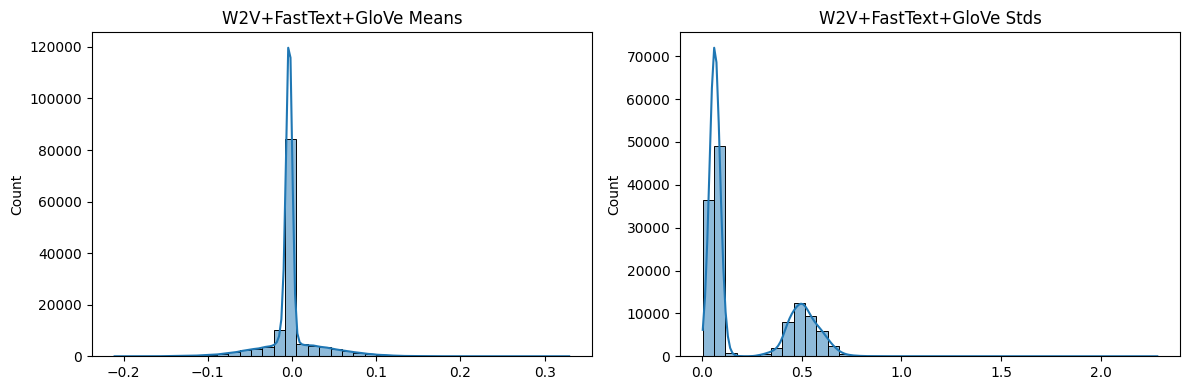

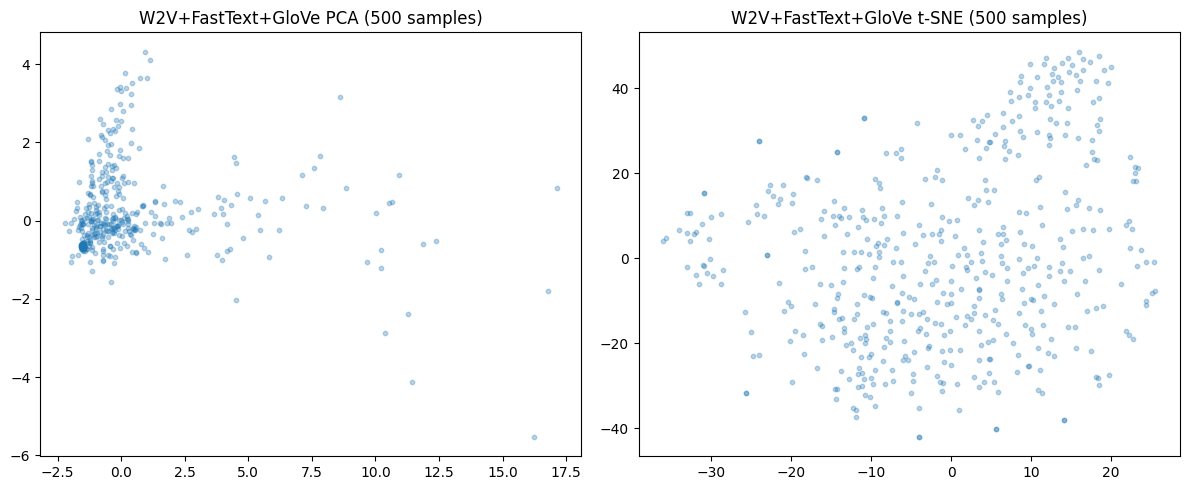


Hybrid Analysis:
Shape: (127621, 100)


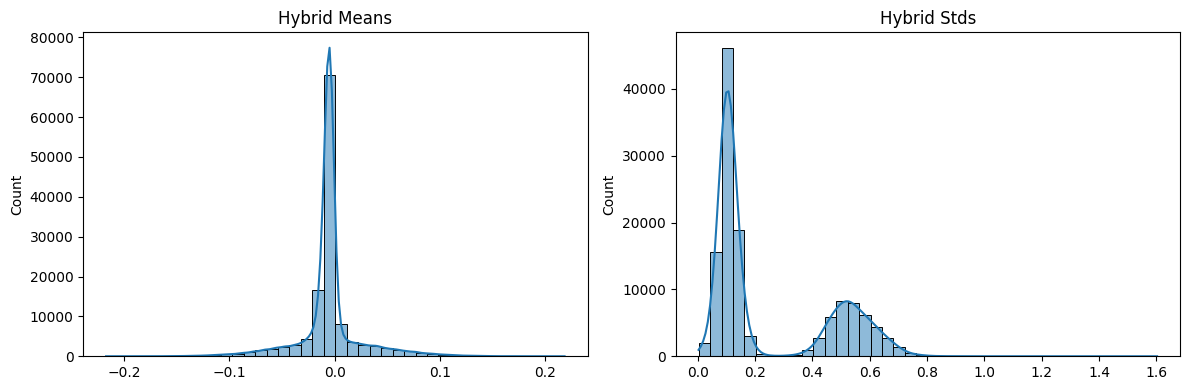

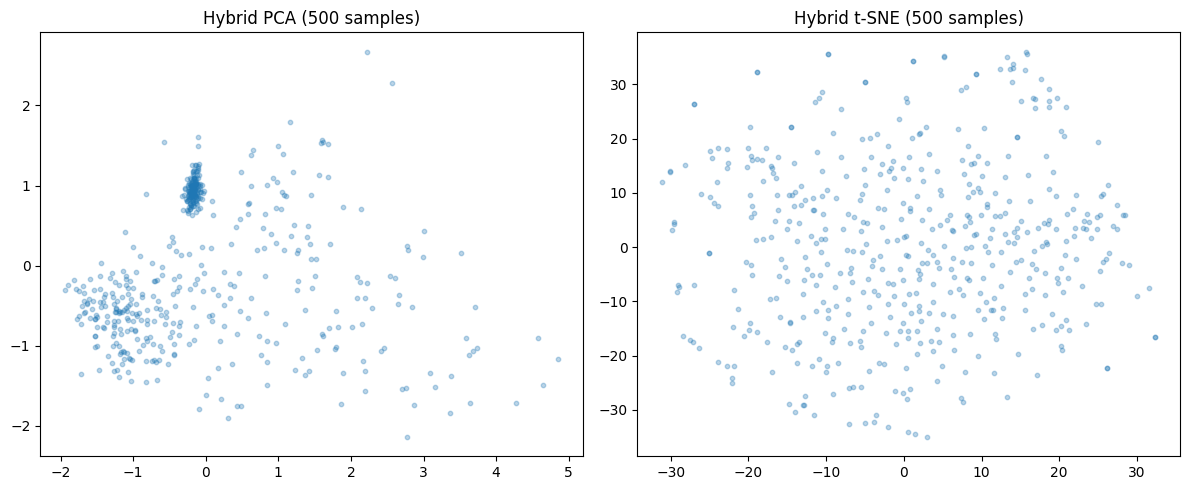


GloVe+W2V Analysis:
Shape: (127621, 100)


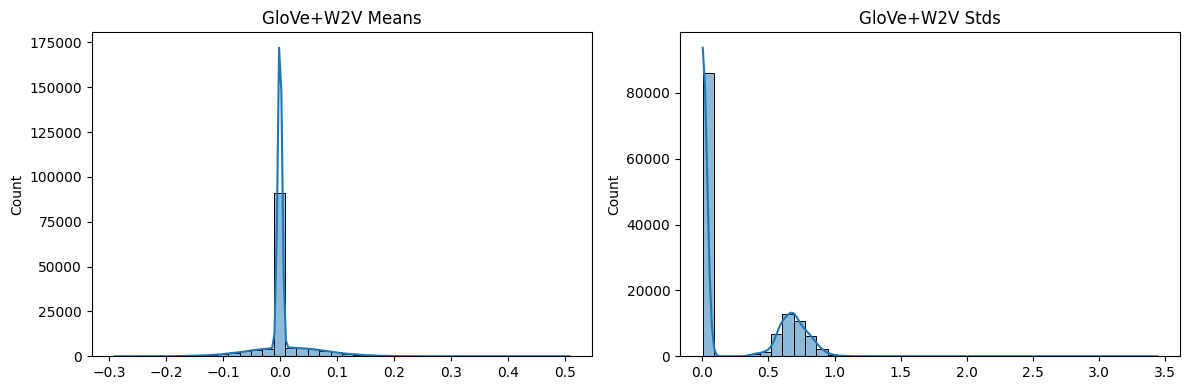

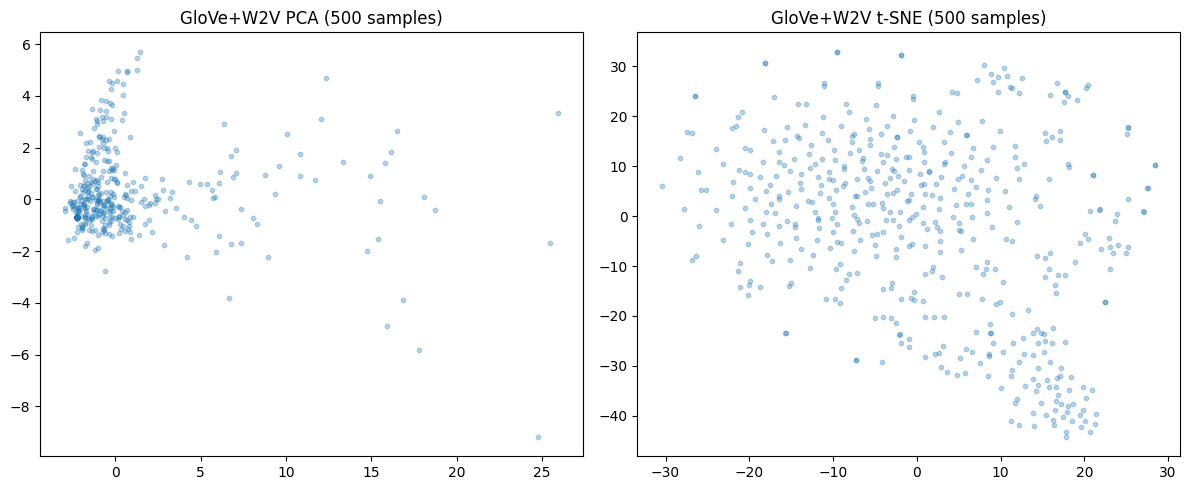


Final W2V Analysis:
Shape: (127621, 100)


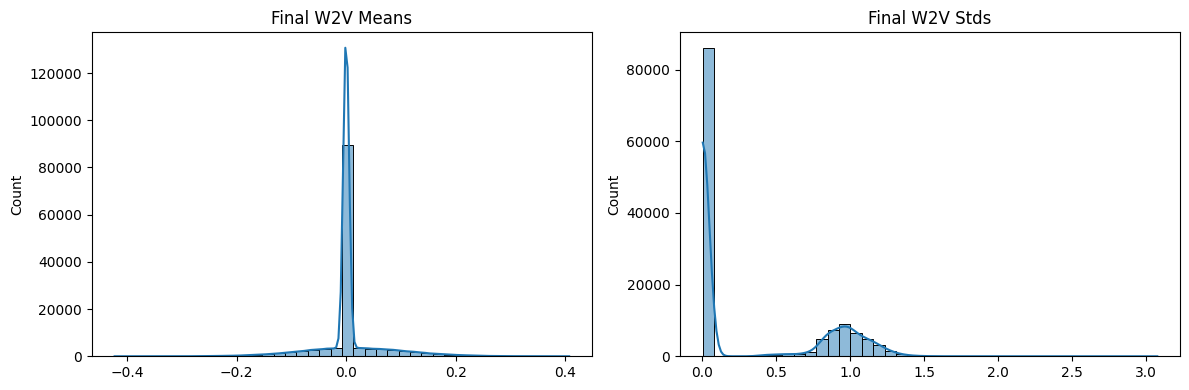

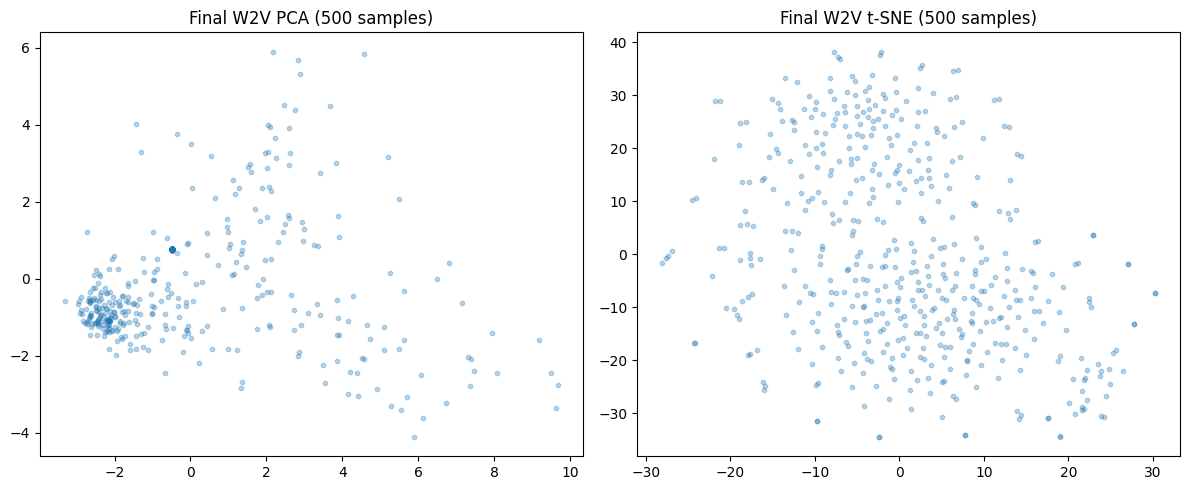

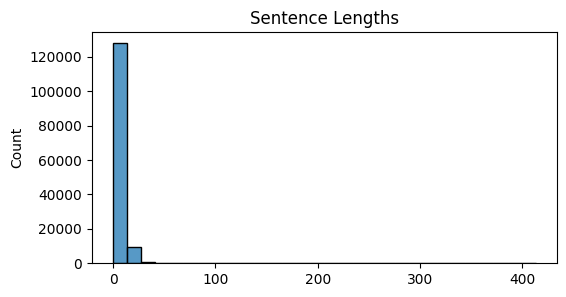

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def fast_analyze(embeddings, name):
    print(f"\n{name} Analysis:")
    print("Shape:", embeddings.shape)

    means = np.mean(embeddings, axis=1)
    stds = np.std(embeddings, axis=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(means, kde=True, bins=40, ax=ax1)
    sns.histplot(stds, kde=True, bins=40, ax=ax2)
    ax1.set_title(f"{name} Means")
    ax2.set_title(f"{name} Stds")
    plt.tight_layout()
    plt.show()

    sample = embeddings[:500]

    pca = PCA(n_components=2, svd_solver='randomized')
    pca_result = pca.fit_transform(sample)

    tsne = TSNE(n_components=2, random_state=42, perplexity=15, angle=0.5)
    tsne_result = tsne.fit_transform(sample)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, s=10)
    ax2.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.3, s=10)
    ax1.set_title(f"{name} PCA (500 samples)")
    ax2.set_title(f"{name} t-SNE (500 samples)")
    plt.tight_layout()
    plt.show()

fast_analyze(w2v_fasttext_glove_combined, "W2V+FastText+GloVe")
fast_analyze(hybrid_embeddings, "Hybrid")
fast_analyze(glove_w2v_enhanced, "GloVe+W2V")
fast_analyze(final_w2v_embeddings, "Final W2V")

if isinstance(augmented_data, list):
    lengths = np.array([len(x['sentence']) for x in augmented_data])
    plt.figure(figsize=(6, 3))
    sns.histplot(lengths, bins=30)
    plt.title("Sentence Lengths")
    plt.show()

Quality analysis for embeddings

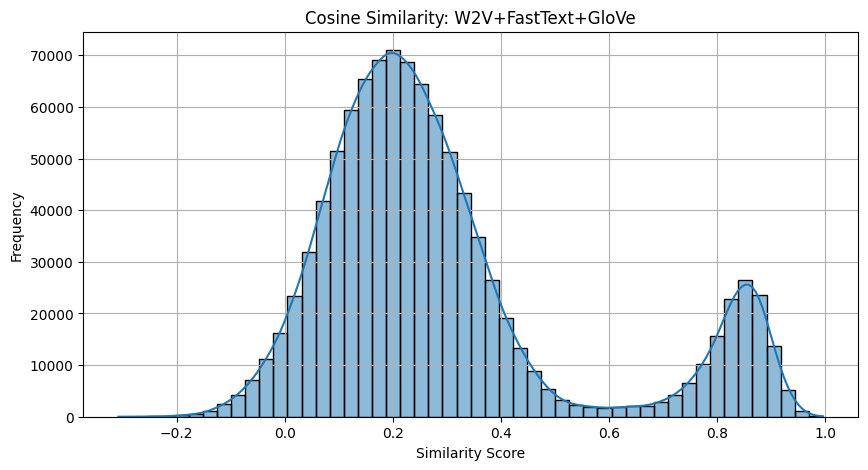

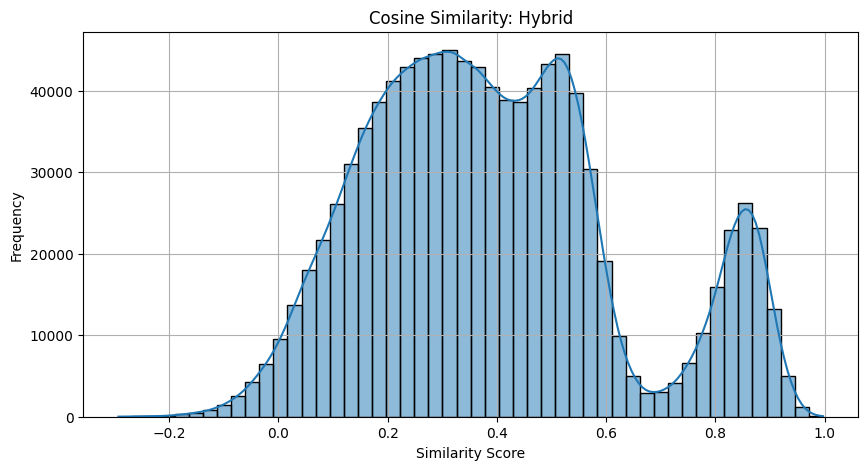

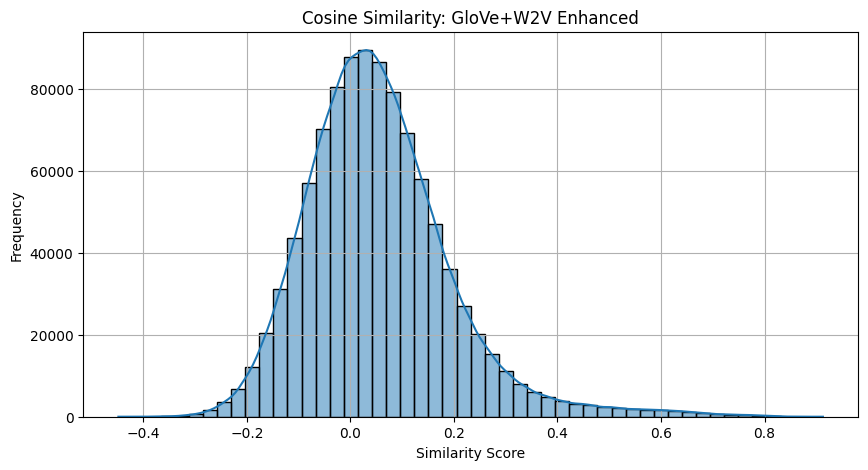

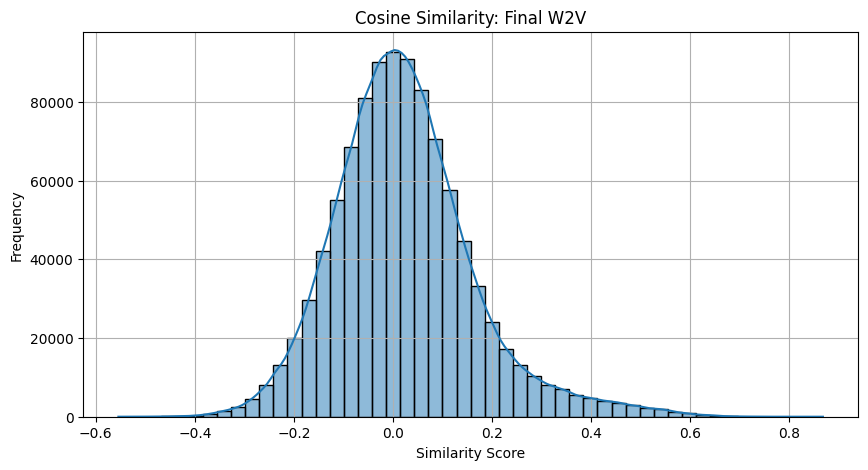

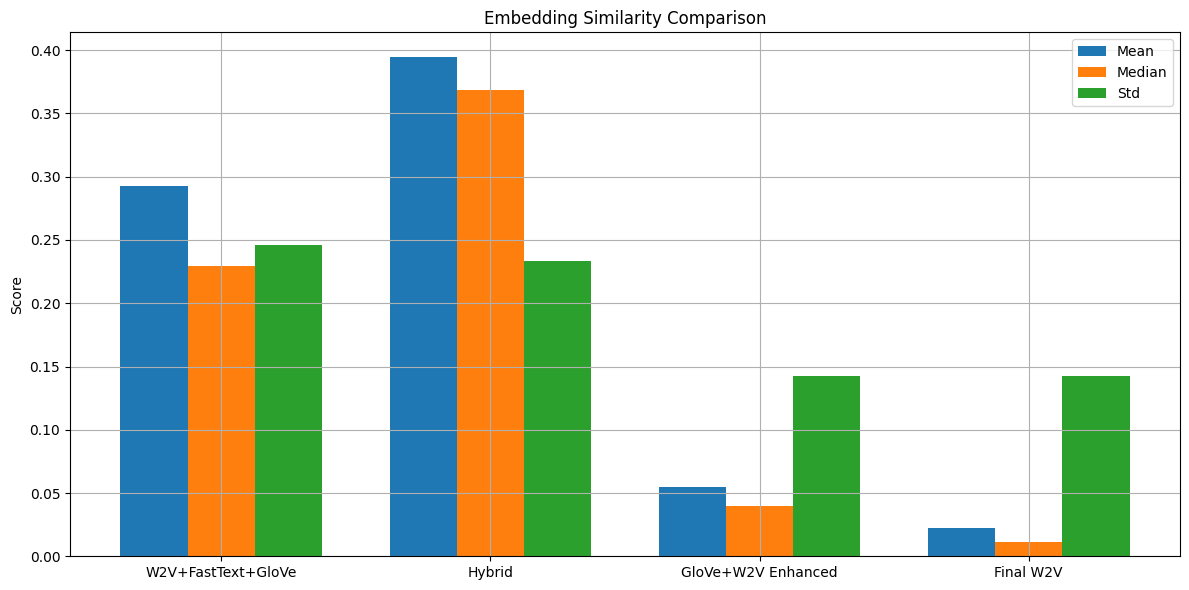

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_embeddings(embeddings, name):
    if len(embeddings) == 0:
        print(f"Skipping {name} - empty embeddings")
        return None

    sample_size = min(1000, len(embeddings))
    subset = embeddings[:sample_size]

    similarity_matrix = cosine_similarity(subset)
    np.fill_diagonal(similarity_matrix, np.nan)
    similarities = similarity_matrix[~np.isnan(similarity_matrix)].flatten()

    plt.figure(figsize=(10, 5))
    sns.histplot(similarities, bins=50, kde=True)
    plt.title(f"Cosine Similarity: {name}")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    return {
        'name': name,
        'mean': np.mean(similarities),
        'median': np.median(similarities),
        'std': np.std(similarities)
    }

embeddings_data = [
    (w2v_fasttext_glove_combined, "W2V+FastText+GloVe"),
    (hybrid_embeddings, "Hybrid"),
    (glove_w2v_enhanced, "GloVe+W2V Enhanced"),
    (final_w2v_embeddings, "Final W2V")
]

results = []
for emb, name in embeddings_data:
    res = analyze_embeddings(emb, name)
    if res:
        results.append(res)

if results:
    metrics = ['mean', 'median', 'std']
    x = np.arange(len(results))
    width = 0.25

    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i*width - width, [r[metric] for r in results],
                width, label=metric.capitalize())

    plt.xticks(x, [r['name'] for r in results])
    plt.title("Embedding Similarity Comparison")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

ESTABLISHING 1:1 CORRESPONDENCE BETWEEN  THE DATA AND THE EMBEDDINGS

In [ ]:
import json
import numpy as np
from tqdm import tqdm

def get_sentence_embedding(sentence, word_to_vec, dim):
    vecs = [word_to_vec[word] for word in sentence if word in word_to_vec]
    return np.mean(vecs, axis=0) if vecs else np.zeros(dim)

try:
    with open("vocabulary.json", "r") as f:
        vocab_data = json.load(f)
        word2idx = vocab_data["word2idx"]
except json.JSONDecodeError as e:
    print(f"Error loading JSON: {e}")
    # Optionally log the issue or attempt to recover part of the data

embeddings = {
    'w2v_fasttext_glove_combined': w2v_fasttext_glove_combined,
    'hybrid': hybrid_embeddings,
    'glove_w2v_enhanced': glove_w2v_enhanced,
    'final_w2v': final_w2v_embeddings
}

results = {}

for name, emb in embeddings.items():
    word_to_vec = {word: emb[idx] for word, idx in word2idx.items() if idx < emb.shape[0]}
    dim = emb.shape[1]

    X = np.vstack([
        get_sentence_embedding(sent['sentence'], word_to_vec, dim)
        for sent in tqdm(augmented_data, desc=f"Processing {name}")
    ])
    y = np.array([sent['sentiment'] for sent in augmented_data])

    results[name] = (X, y)


Processing final_w2v: 100%|██████████| 138073/138073 [00:04<00:00, 32338.97it/s]


# New Section

In [ ]:
print(list(word_to_vec.items())[:5])


[('jpmorgan', array([-1.470894  , -0.35429546, -0.6889812 , -0.32168496, -0.6491811 ,
       -0.7242739 ,  1.2164083 ,  0.10041822, -0.48392066, -0.0032294 ,
       -0.51285255,  0.13292049,  0.19286194,  0.61885124,  0.6982453 ,
       -0.937242  ,  0.05949146, -0.2349857 ,  0.1725459 , -0.1323141 ,
        0.05278917,  0.5809697 , -0.2605944 , -0.5127813 ,  0.7137228 ,
       -0.7680929 , -1.5360365 ,  0.9728088 ,  0.2432144 , -0.39434382,
        0.320001  ,  0.19606397,  0.67231065,  0.10416584,  0.24349865,
        0.7289844 , -0.28622255,  0.37704524,  0.4680703 ,  0.6082571 ,
        0.36558554, -0.6944479 ,  0.5240023 ,  1.0054842 , -0.3697998 ,
        0.6880283 ,  0.06283934, -0.17843299, -0.41166037, -0.11038588,
       -0.1775544 ,  0.71845347,  0.5704384 ,  0.66988987, -0.6559438 ,
        0.5470996 , -0.5621324 , -0.45529142, -0.45757487, -0.42253852,
       -0.5325833 ,  0.50780874,  0.06344403, -0.10053907,  0.5802733 ,
        1.571682  , -0.01954578,  1.0982257 , -0.6

In [ ]:
for name, (X, y) in results.items():
    print(f"\n📌 Embedding Type: {name}")

    first_sentence = ' '.join(augmented_data[0]['sentence'])
    first_sentiment = y[0]
    first_embedding = X[0]

    print(f"Sentence: {first_sentence}")
    print(f"Sentiment: {first_sentiment}")
    print(f"Embedding Vector Shape: {first_embedding.shape}")
    print(f"Embedding Vector (first 10 dims): {first_embedding[:10]}")



📌 Embedding Type: w2v_fasttext_glove_combined
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [ 0.60486704 -0.39731351 -1.01092744  0.53014904 -0.35825965  0.31430775
  0.23071483 -0.41191959 -0.28767124 -0.32138544]

📌 Embedding Type: hybrid
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [-0.74516398  0.13985236 -0.6982094   0.55254984 -0.16432495  0.1822277
  0.26354805 -0.37307018 -0.11474097 -0.48264724]

📌 Embedding Type: glove_w2v_enhanced
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (first 10 dims): [ 1.01956952 -0.98021746 -1.26912153  0.38353303 -0.53153169  0.44282287
  0.0845359  -0.47157136 -0.38929993 -0.13126487]

📌 Embedding Type: final_w2v
Sentence: jpmorgan reel expectation beyond meat
Sentiment: 0
Embedding Vector Shape: (100,)
Embedding Vector (firs

In [ ]:
for name, value in results.items():
    print(f"\nVerifying alignment for: {name}")

    if not isinstance(value, tuple) or len(value) != 2:
        print(f"❌ Skipping {name} — Invalid structure: {type(value)}")
        continue

    X, y = value

    # First 5 samples
    for i in range(5):
        sent_text = ' '.join(augmented_data[i]['sentence'])
        orig_sent = augmented_data[i]['sentiment']
        pred_sent = y[i]
        print(f"\nSample {i}:")
        print(f"Sentence: {sent_text}")
        print(f"Original Sentiment: {orig_sent}")
        print(f"Predicted Sentiment: {pred_sent}")
        print(f"Embedding Shape: {X[i].shape}")
        assert orig_sent == pred_sent, f"Mismatch in sentiment at index {i}"

    # Random 5 samples
    idxs = np.random.choice(len(augmented_data), 5, replace=False)
    for idx in idxs:
        assert augmented_data[idx]['sentiment'] == y[idx], f"Mismatch at random index {idx}"

    print(f"✅ All {len(augmented_data)} samples aligned correctly for {name}")

print("\n🎉 All embeddings are aligned and correctly paired with sentiments!")



Verifying alignment for: w2v_fasttext_glove_combined

Sample 0:
Sentence: jpmorgan reel expectation beyond meat
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 1:
Sentence: jpmorgan reel company [UNK] ॥
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 2:
Sentence: nomura point booking weakness carnival royal caribbean
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 3:
Sentence: nomura national sports group carnival royal caribbean
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 4:
Sentence: cemex cut credit suisse j.p morgan weak building outlook
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)
✅ All 138073 samples aligned correctly for w2v_fasttext_glove_combined

Verifying alignment for: hybrid

Sample 0:
Sentence: jpmorgan reel expectation beyond meat
Original Sentiment: 0
Predicted Sentiment: 0
Embedding Shape: (100,)

Sample 1:
Sentence: jpmorgan 


# **MODELS IMPLEMENTATION**

LOGISTIC REGRESSSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

for name, (X, y) in results.items():
    print(f"\n🔍 Logistic Regression on: {name}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ F1 Score (weighted): {f1:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))


🔍 Logistic Regression on: w2v_fasttext_glove_combined
✅ Accuracy: 0.5083
✅ F1 Score (weighted): 0.4638
📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.44      0.08      0.13      6565
           0       0.48      0.72      0.58     11240
           1       0.56      0.55      0.56      9810

    accuracy                           0.51     27615
   macro avg       0.50      0.45      0.42     27615
weighted avg       0.50      0.51      0.46     27615


🔍 Logistic Regression on: hybrid
✅ Accuracy: 0.5196
✅ F1 Score (weighted): 0.4749
📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.08      0.13      6565
           0       0.49      0.70      0.58     11240
           1       0.57      0.61      0.59      9810

    accuracy                           0.52     27615
   macro avg       0.50      0.46      0.43     27615
weighted avg       0.51      0.52      0.47     27615




SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

for name, (X, y) in results.items():
    print(f"\n💪 Powerful SVM (RBF) on: {name}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']
    }

    grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=0, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🔥 Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred))



💪 Powerful SVM (RBF) on: w2v_fasttext_glove_combined


RANDOM FOREST

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

for name, (X, y) in results.items():
    print(f"\n💪 Powerful SVM (RBF) on: {name}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']
    }

    grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=0, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🔥 Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred))



💪 Powerful SVM (RBF) on: w2v_fasttext_glove_combined


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for name, (X, y) in results.items():
    print(f"\n🌳 Random Forest on: {name}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

for name, (X, y) in results.items():
    print(f"\n⚡ CNN on: {name}")

    X = X.reshape(X.shape[0], X.shape[1], 1)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_cat = to_categorical(y_encoded)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
    )

    model = Sequential([
        Input(shape=(X.shape[1], 1)),
        Conv1D(64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(y_cat.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0, validation_split=0.1,
              callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Accuracy: {acc:.4f}")
